Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Uploading Dataset

In [2]:
link = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Avocado/avocado.csv.zip'
df = pd.read_csv(link)

Looking at the Dataset

In [3]:
df.shape

(18249, 14)

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#The unnamed column is just the repetition of index, hence we will remove it
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
df = df.rename(columns={'4046': 'Tsale_s', '4225': 'Tsale_l', '4770' : 'Tsale_xl'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Tsale_s       18249 non-null  float64
 4   Tsale_l       18249 non-null  float64
 5   Tsale_xl      18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
df.describe()

,AveragePrice,Total Volume,Tsale_s,Tsale_l,Tsale_xl,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
Tsale_s         0
Tsale_l         0
Tsale_xl        0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Data Preprocessing

In [11]:
#since date is of type object, we change it to type date
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [12]:
df.head()

,Date,AveragePrice,Total Volume,Tsale_s,Tsale_l,Tsale_xl,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Data Visualization 

In [13]:
#let us see how many types are there
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [14]:
#let us see how many regions are there
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [15]:
df['region'].nunique()

54

Let us plot a few graphs

<Figure size 200x100 with 0 Axes>

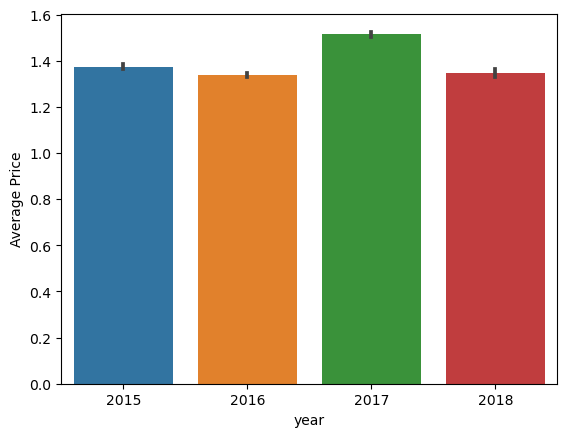

<Figure size 200x100 with 0 Axes>

In [16]:
# between average price and the year 
sns.barplot(x='year',y='AveragePrice', data=df)
plt.ylabel('Average Price')
plt.figure(figsize=(2, 1))

We can infer that the sale is increasing and has significantly increased in the year 2017

Text(0.5, 0, 'Average Price')

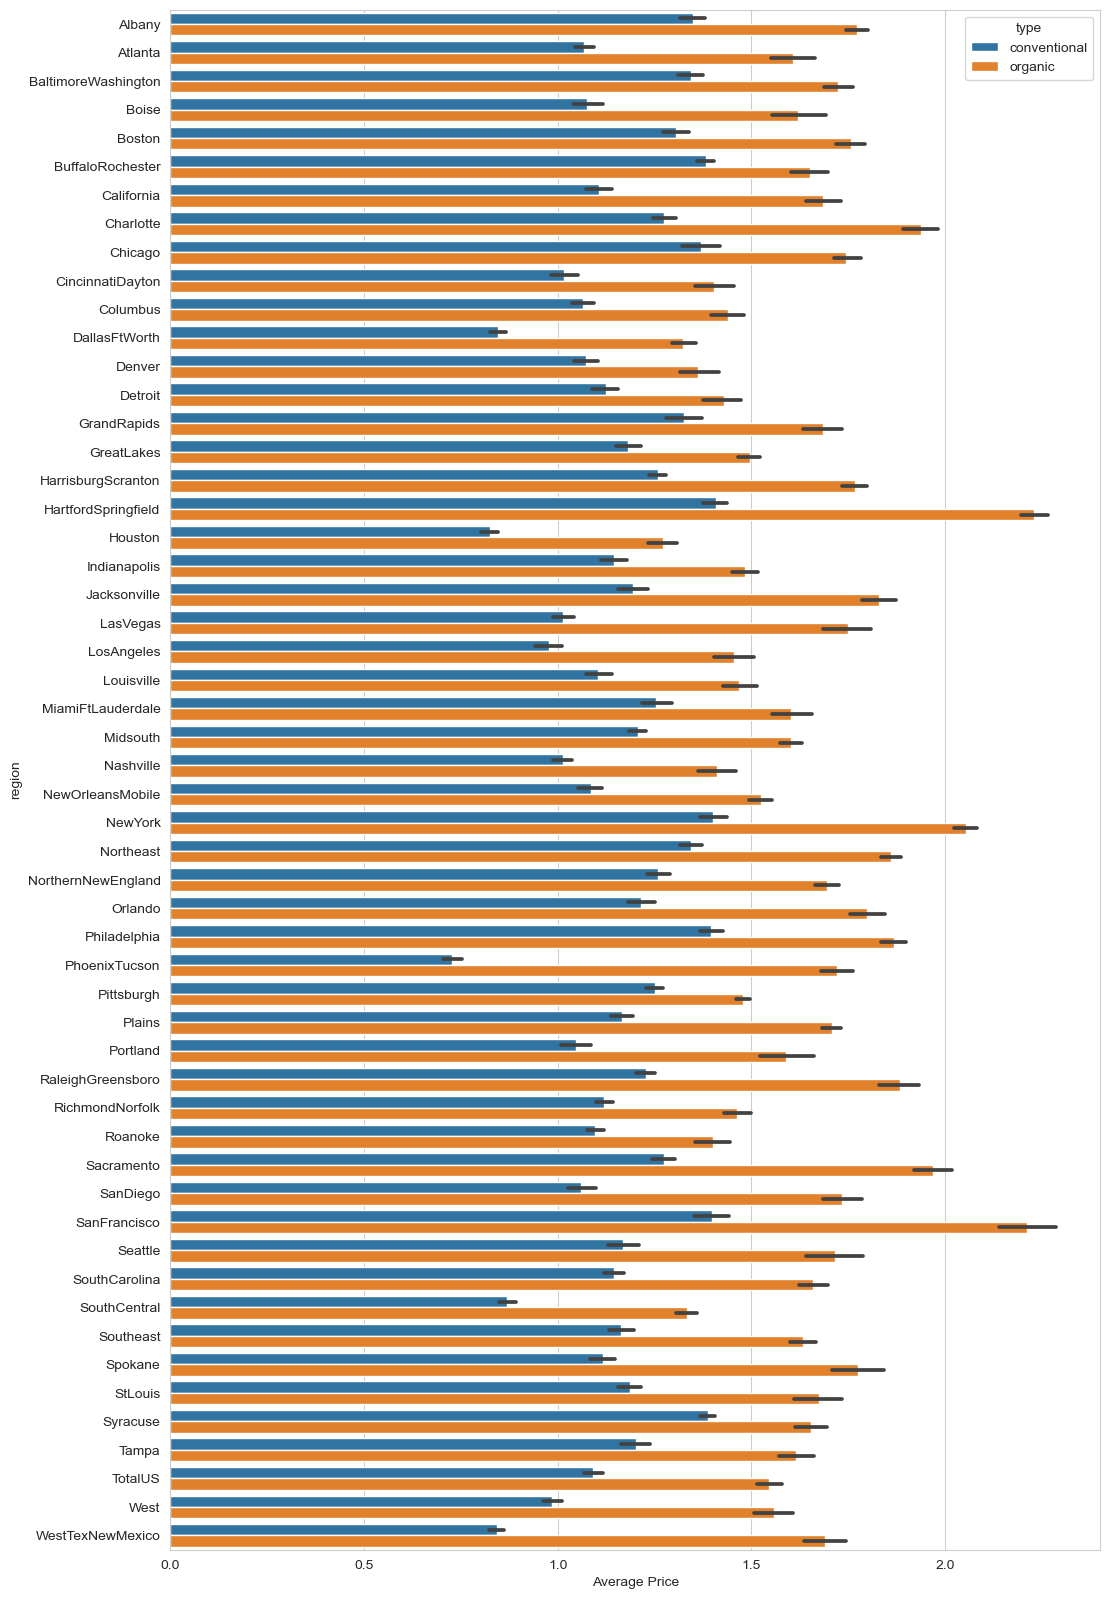

In [17]:
#between the average price, region and the type of avocado
sns.set_style('whitegrid')
plt.figure(figsize=(12,20))
sns.barplot(y='region', x='AveragePrice', hue='type', data=df)
plt.xlabel('Average Price')

<Axes: xlabel='Total Volume', ylabel='region'>

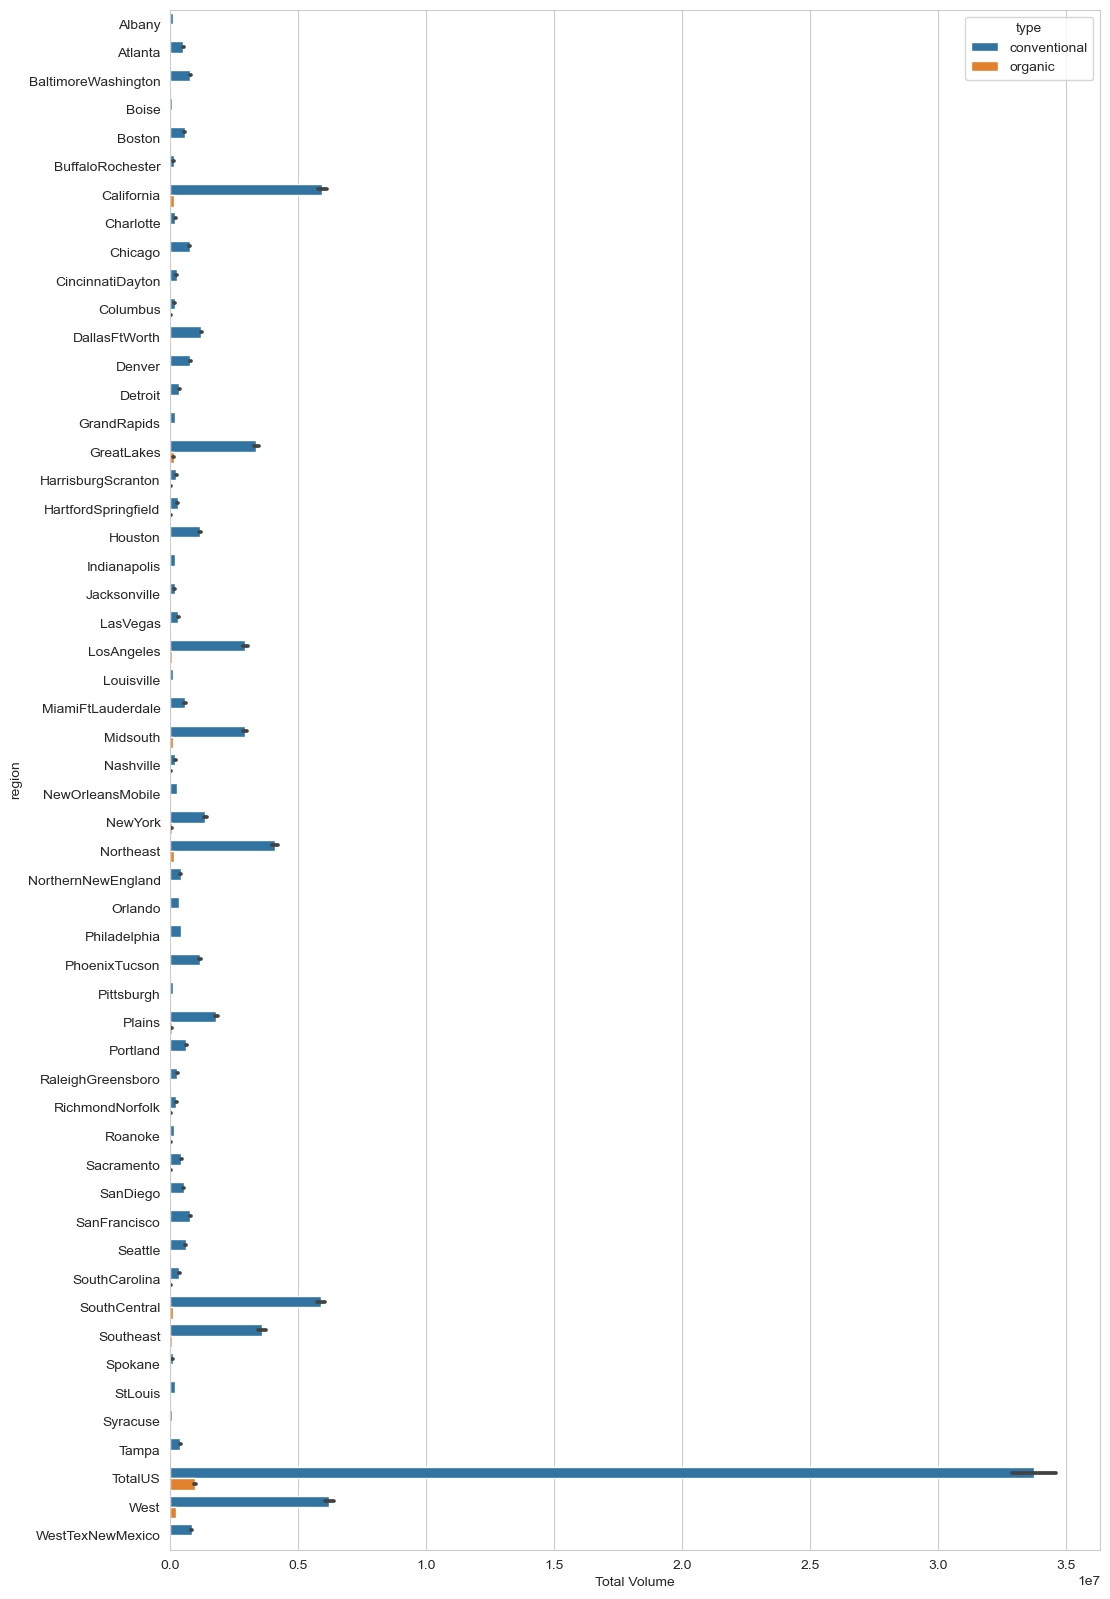

In [18]:
#between the total volume, region and the type of avocado

# Create the bar plot
plt.figure(figsize=(12,20))
sns.barplot(data=df, y='region', x='Total Volume', hue='type')

We can see that the 'Total US' is giving us a outlier, so let us remove it and get the graph

<Axes: xlabel='Total Volume', ylabel='region'>

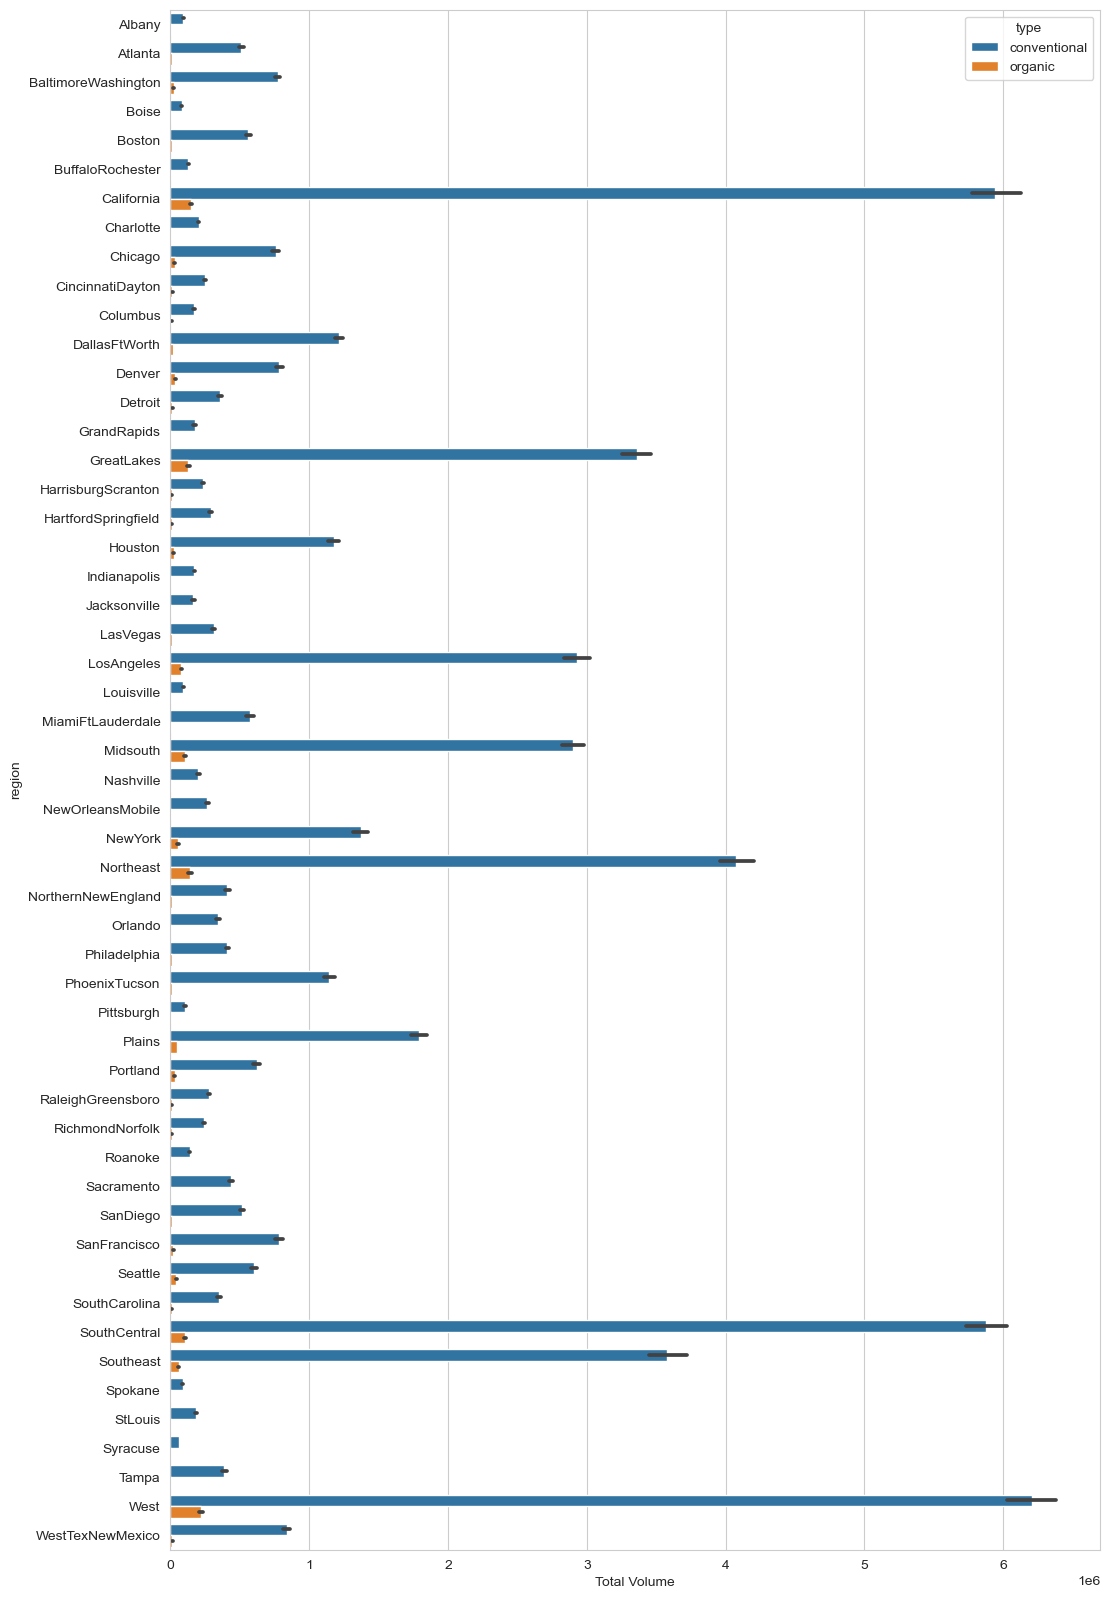

In [19]:
filtered_df = df[df['region'] != 'TotalUS']

# Create the bar plot
plt.figure(figsize=(12,20))
sns.barplot(data=filtered_df, y='region', x='Total Volume', hue='type')

Cannot infer much, but we can see that for each region, conventional type has more volume than the organic type.

In [20]:
#checking the distribution of the columns (won't be applicable for dates, type and region)

numeric_cols = df.select_dtypes(include=[np.number]).columns
items_to_drop = ['year', 'Month', 'Day']
numeric_cols = [x for x in numeric_cols if x not in items_to_drop]

<Axes: >

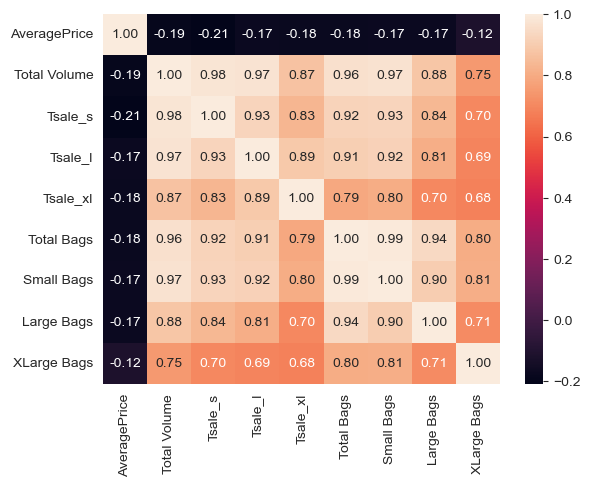

In [21]:
#making correlation matrix 
#cols = ['AveragePrice', 'Total Volume', 'Total Bags', 'type', 'year', 'region']

cor_mat = df[numeric_cols].corr()
sns.heatmap(cor_mat, annot=True, fmt='.2f')

array([[<Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': 'Tsale_s'}>,
        <Axes: title={'center': 'Tsale_l'}>],
       [<Axes: title={'center': 'Tsale_xl'}>,
        <Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>],
       [<Axes: title={'center': 'XLarge Bags'}>, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

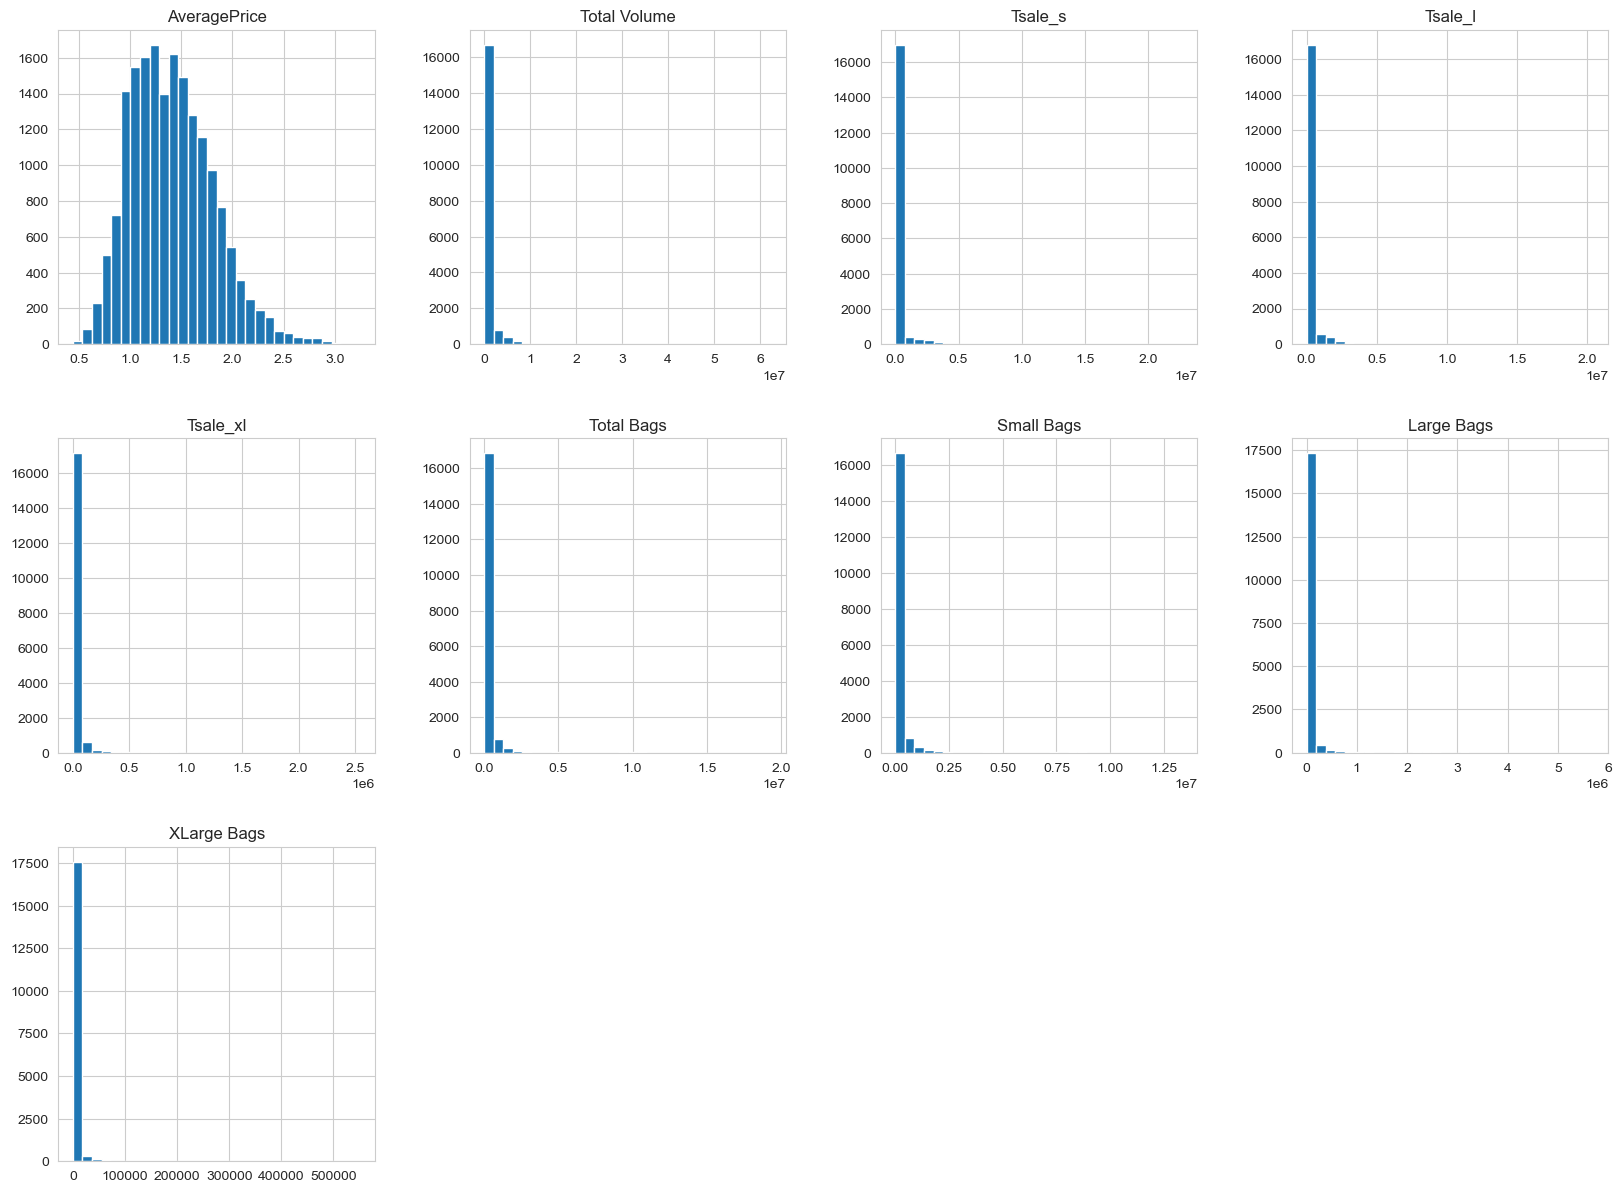

In [22]:
df[numeric_cols].hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

Apart from the 'AveragePrice', the data is positively skewed.

Checking the outliers (removing the date, type and region columns)

AveragePrice       Axes(0.125,0.712609;0.133621x0.167391)
Total Volume    Axes(0.285345,0.712609;0.133621x0.167391)
Tsale_s          Axes(0.44569,0.712609;0.133621x0.167391)
Tsale_l         Axes(0.606034,0.712609;0.133621x0.167391)
Tsale_xl        Axes(0.766379,0.712609;0.133621x0.167391)
Total Bags         Axes(0.125,0.511739;0.133621x0.167391)
Small Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Large Bags       Axes(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.606034,0.511739;0.133621x0.167391)
dtype: object

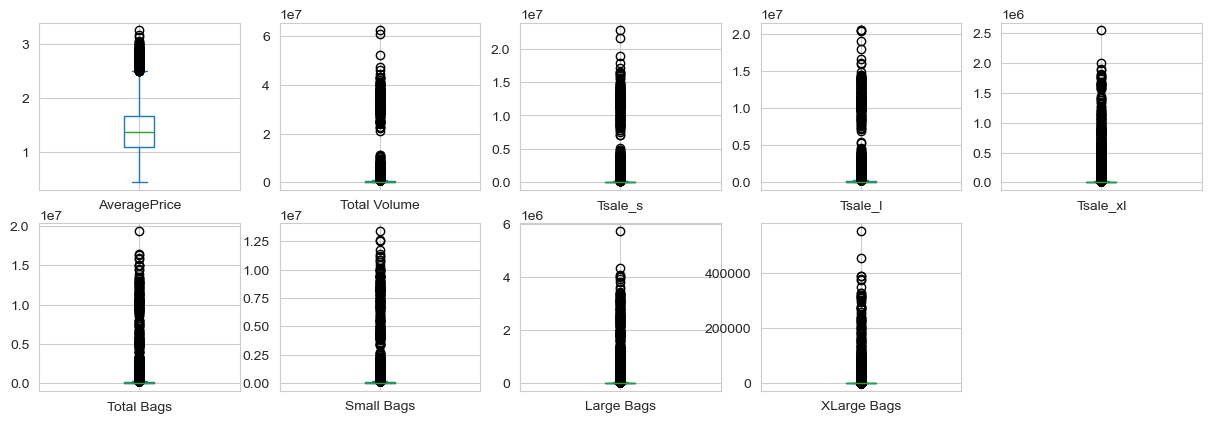

In [23]:
df[numeric_cols].plot(kind = 'box', subplots = True, layout=(4,5), figsize = (15,10))

In [24]:
#calculating the z-score
from scipy.stats import zscore

z = np.abs(zscore(df[numeric_cols]))
print(z)

       AveragePrice  Total Volume   Tsale_s   Tsale_l  Tsale_xl  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags  
0     

Making a new dataframe where we make the following changes: <ol>
  <li>Encoding region</li>
  <li>Encoding type</li>
  <li>Removing outliers</li>
  <li>Standardizing the data</li>
  <li>Removing the day and date column</li>  
</ol>

In [25]:
df1 = df

In [26]:
#removing columns
df1.drop(['Date', 'Day'], axis=1, inplace=True)

In [27]:
df1.columns

Index(['AveragePrice', 'Total Volume', 'Tsale_s', 'Tsale_l', 'Tsale_xl',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode the type column
df1['type'] = label_encoder.fit_transform(df1['type'])

In [29]:
label_encoder = LabelEncoder()

# Encode the region column
df1['region'] = label_encoder.fit_transform(df1['region'])

In [30]:
# Storing the mapping of encoded values to original values
encoded_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [31]:
df1.head()

,AveragePrice,Total Volume,Tsale_s,Tsale_l,Tsale_xl,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [32]:
df1.columns

Index(['AveragePrice', 'Total Volume', 'Tsale_s', 'Tsale_l', 'Tsale_xl',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [33]:
#removing outliers using z-score

valid_cols = ['AveragePrice', 'Total Volume', 'Tsale_s', 'Tsale_l', 'Tsale_xl', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']
z = np.abs(zscore(df1[valid_cols]))

threshold = 3
print(np.where(z<3))
print(df1.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))
(18249, 13)


In [34]:
df1[(z<3).all(axis = 1)]

,AveragePrice,Total Volume,Tsale_s,Tsale_l,Tsale_xl,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


AveragePrice       Axes(0.125,0.712609;0.133621x0.167391)
Total Volume    Axes(0.285345,0.712609;0.133621x0.167391)
Tsale_s          Axes(0.44569,0.712609;0.133621x0.167391)
Tsale_l         Axes(0.606034,0.712609;0.133621x0.167391)
Tsale_xl        Axes(0.766379,0.712609;0.133621x0.167391)
Total Bags         Axes(0.125,0.511739;0.133621x0.167391)
Small Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Large Bags       Axes(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.606034,0.511739;0.133621x0.167391)
type            Axes(0.766379,0.511739;0.133621x0.167391)
year                Axes(0.125,0.31087;0.133621x0.167391)
region           Axes(0.285345,0.31087;0.133621x0.167391)
Month             Axes(0.44569,0.31087;0.133621x0.167391)
dtype: object

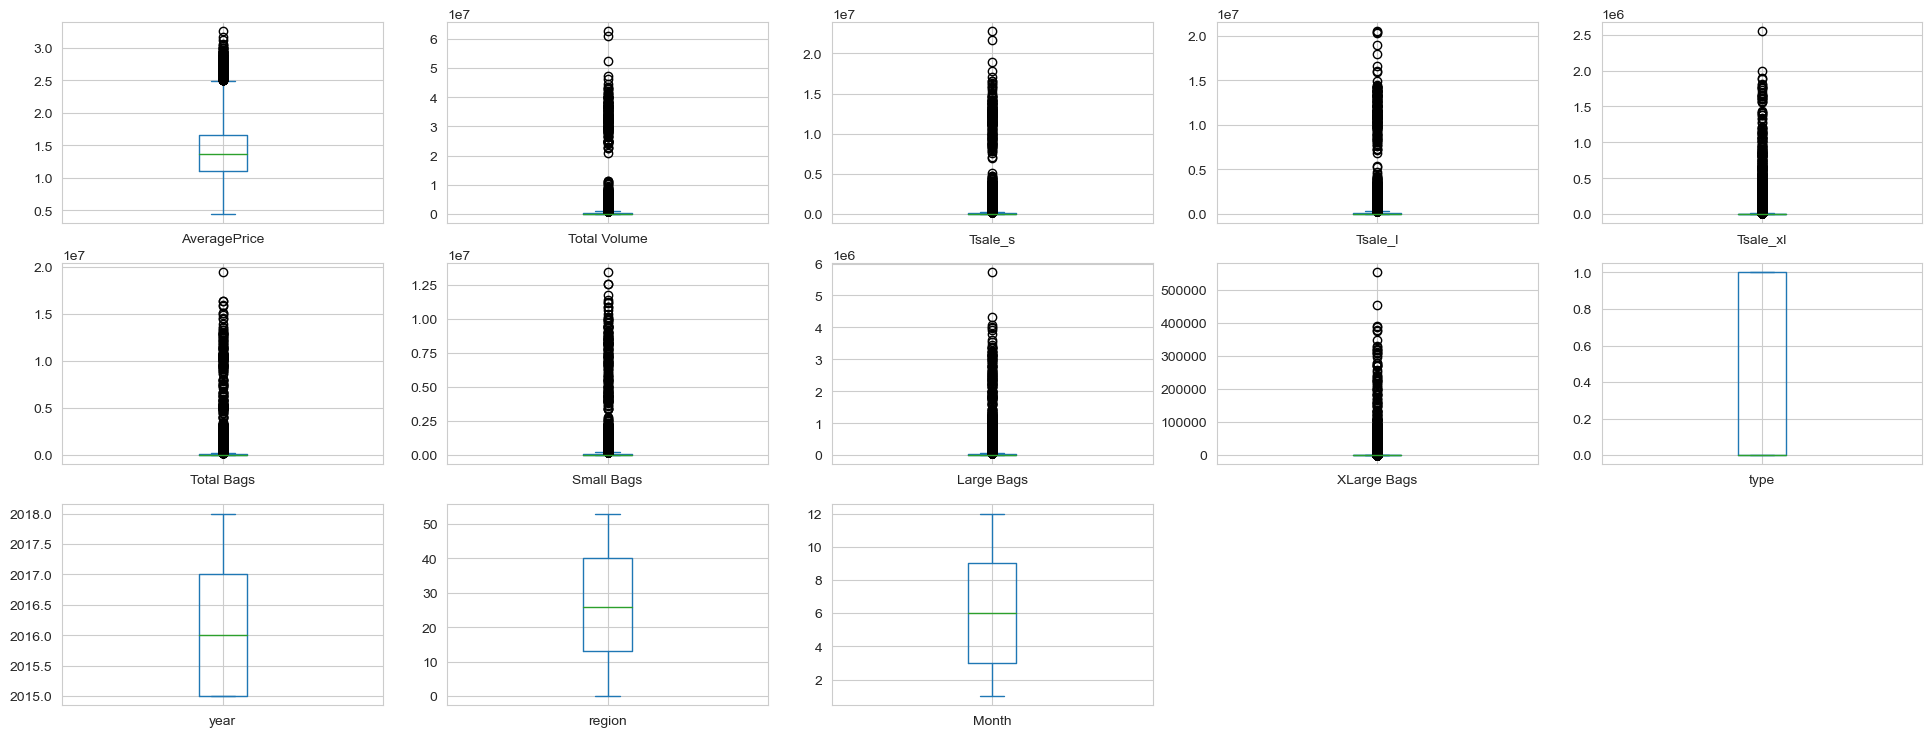

In [35]:
df1.plot(kind='box',subplots = True,layout=(4,5),figsize = (24,12))

Even though there are still many outliers, I do not think that we should do any more processing for the same. <br> Model for finding the Average Price:

In [36]:
y = df1[['AveragePrice']]    #target variable
X = df1.drop(['AveragePrice'], axis=1)         
print(X.shape)
print(y.shape)

(18249, 12)
(18249, 1)


In [37]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[['Total Volume', 'Tsale_s', 'Tsale_l', 'Tsale_xl', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]=scaler.fit_transform(X[['Total Volume', 'Tsale_s', 'Tsale_l', 'Tsale_xl', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])

Machine Learning Models

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# define a function to evaluate the model prediction
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

summary = []
def evaluate_model(ml_model, test, pred):
    model = {}
    model['model'] = ml_model
    model['MAE'] = mean_absolute_error(test,pred)
    model['MSE'] = mean_squared_error(test,pred)
    model['rMSE'] = np.sqrt(model['MSE'])
    model['r2'] = r2_score(test,pred)
    summary.append(model)
    
    print(f'MAE: %.4f' % model['MAE'])
    print(f'MSE: %.4f' % model['MSE'])
    print(f'RMSE: %.4f' % model['rMSE'])
    print(f'R2 Score: %.4f' % model['r2'])
    
    # plot the y_test y_pred
    plt.scatter(test,pred)
    plt.title(f"{ml_model} y_test vs y_pred")
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    filename = f"plot_{ml_model}.png"
    # plt.savefig(filename, bbox_inches="tight")
    plt.show()

MAE: 0.2331
MSE: 0.0912
RMSE: 0.3020
R2 Score: 0.4322


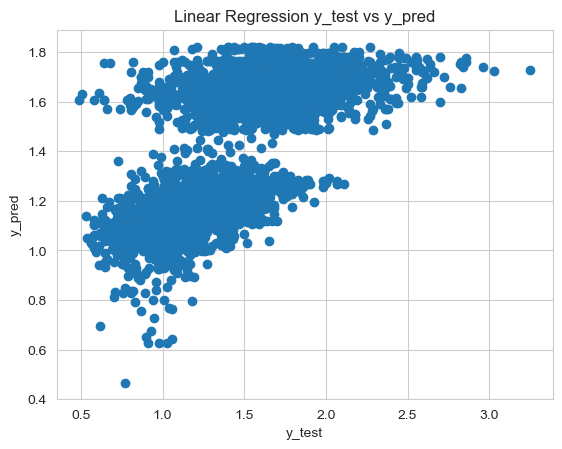

In [40]:
# creating and training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
y_pred = lr_fit.predict(X_test)

# evaluate the model
evaluate_model('Linear Regression', y_test, y_pred)

MAE: 0.1242
MSE: 0.0376
RMSE: 0.1940
R2 Score: 0.7658


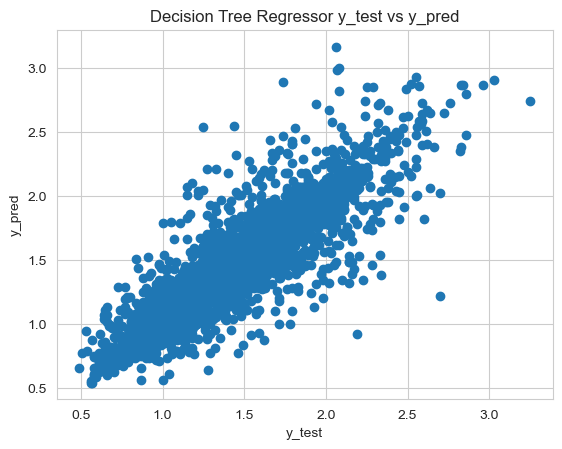

In [41]:
# creating and training the model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr_fit = dtr.fit(X_train, y_train)
y_pred = dtr_fit.predict(X_test)

# evaluate the model
evaluate_model('Decision Tree Regressor', y_test, y_pred)

MAE: 0.0923
MSE: 0.0176
RMSE: 0.1328
R2 Score: 0.8902


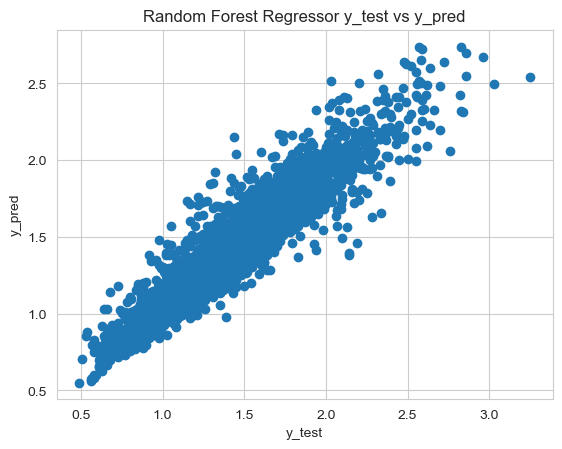

In [42]:
# creating and training the model
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr_fit = rdr.fit(X_train, y_train)
y_pred = rdr_fit.predict(X_test)

# evaluate the model
evaluate_model('Random Forest Regressor', y_test, y_pred)

In [43]:
#comparing the models
pd.DataFrame(summary)

,model,MAE,MSE,rMSE,r2
0,Linear Regression,0.233093,0.091223,0.302032,0.432230
1,Decision Tree Regressor,0.124219,0.037626,0.193975,0.765815
2,Random Forest Regressor,0.092289,0.017639,0.132813,0.890213
